<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Linear Regression Multiple Outputs</h1> 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import nn, optim
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

torch.manual_seed(1)

### Make Some Data 

In [2]:
# Create dataset class w/ 2D features and 2 targets:

class Data(Dataset):
    def __init__(self):
            self.x = torch.zeros(20,2)
            self.x[:,0] = torch.arange(-1,1,0.1)
            self.x[:,1] = torch.arange(-1,1,0.1)
            self.w = torch.tensor([ [1.0,-1.0],[1.0,3.0]])
            self.b = torch.tensor([[1.0,-1.0]])
            self.f = torch.mm(self.x,self.w)+self.b
            
            self.y = self.f+0.001*torch.randn((self.x.shape[0],1))
            self.len = self.x.shape[0]

    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [3]:
# Create dataset object
data_set = Data()

### Create the Model, Optimizer, and Total Loss Function(Cost)

In [4]:
# Create custom module

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [5]:
model = LR(2,2)

In [6]:
# Create optimizer object and set the learning rate to 0.1

optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [7]:
# Create the criterion function that calculates the total loss or cost

criterion = nn.MSELoss()

In [8]:
train_loader = DataLoader(dataset = data_set, batch_size = 5)

### Train the Model via Mini-Batch Gradient Descent

Run 100 epochs of Mini-Batch Gradient Descent and store the total loss or cost for every iteration. Remember that this is an approximation of the true total loss or cost.


In [9]:
LOSS = []
epochs = 100
   
for epoch in range(epochs):
    for x,y in train_loader:
        yhat = model(x)
        loss = criterion(yhat,y)
        LOSS.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

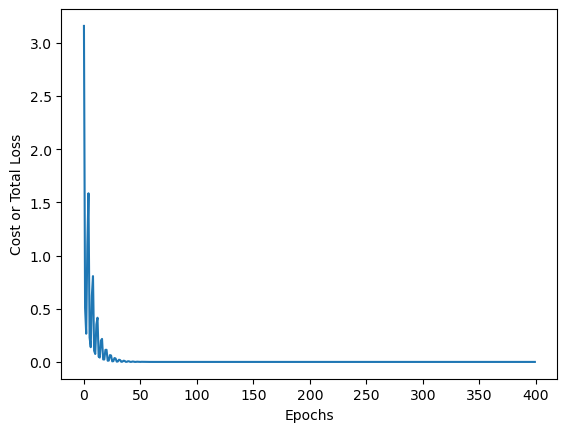

In [10]:
# Plot the cost

plt.plot(LOSS)
plt.xlabel('Epochs')
plt.ylabel('Cost or Total Loss')
plt.show()